In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import optimizers

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
raw_data = np.loadtxt(open("EEG.csv", "rb"), delimiter=",", skiprows=0)
X_raw = raw_data[:,:-1]

# Data cleaning on X
upper_threshold = 4800
lower_threshold = 3800
too_big = X_raw>upper_threshold
too_small = X_raw<lower_threshold
X_cleaned = np.copy(X_raw)
X_cleaned[too_big] = upper_threshold
X_cleaned[too_small] = lower_threshold

X_toPCA = (X_cleaned - np.mean(X_cleaned)) / np.std(X_cleaned)
y = raw_data[:,-1]

In [3]:
pca = PCA(n_components=3)
X = pca.fit_transform(X_toPCA)

In [4]:
num_train = int(X.shape[0] * 0.6)
num_val = int(X.shape[0] * 0.3)
X_train = X[:num_train,:]
y_train = y[:num_train]
X_val = X[num_train:num_train+num_val,:]
y_val = y[num_train:num_train+num_val]
X_test = X[num_train+num_val:,:]
y_test = y[num_train+num_val:]

In [5]:
model = Sequential()
model.add(Dense(256, activation = 'relu', input_dim=X.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
adam = optimizers.Adam(lr=0.001,decay=1e-6)
model.compile(optimizer = adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(X_train, y_train,validation_data = (X_val,y_val), epochs=50, batch_size=64)

Train on 8988 samples, validate on 4494 samples
Epoch 1/50
8988/8988 [==============================] - 1s - loss: 0.6296 - acc: 0.6462 - val_loss: 0.9642 - val_acc: 0.3696

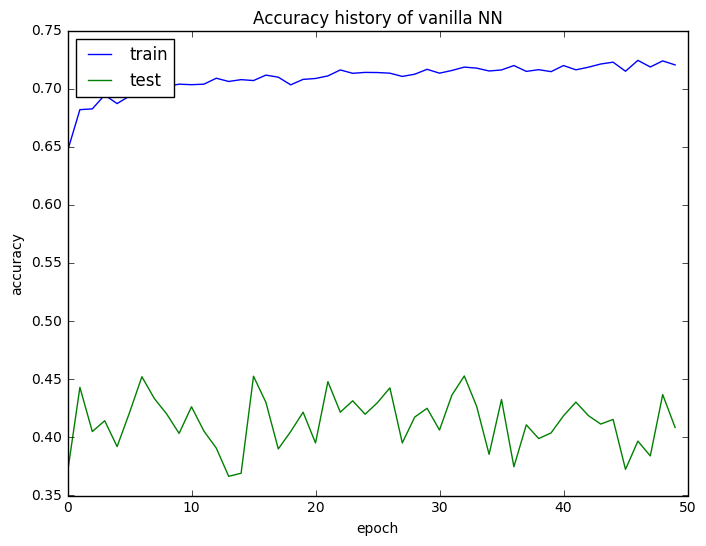

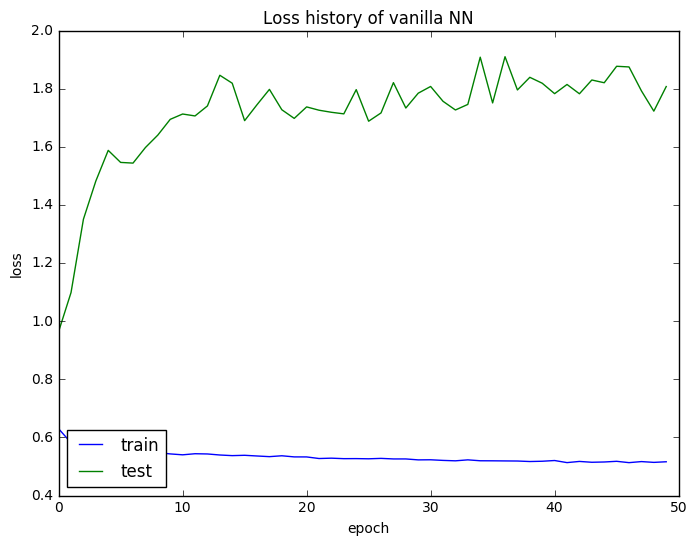

In [7]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy history of vanilla NN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss history of vanilla NN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()